## Summary ##

This dataset about information of baseball players. 
It includes player's name, handedness (right, left handed, or both), height, weight, batting average, and the number of home runs.


## Design ##
### Exploratory Data Analysis using Python ###
I downloaded `baseball_data.csv` the dataset from data set options page given by Udacity. The dataset had player's physical information(`name`, `height`, `weight`) and performance information(`avg`, `HR`).

In [52]:
from pandas import DataFrame, read_csv, cut
df = read_csv('data/baseball_data.csv')
df.describe()

,height,weight,avg,HR
count,1157.000000,1157.000000,1157.000000,1157.000000
mean,72.756266,184.513397,0.186793,45.359551
std,2.142272,15.445995,0.106175,74.065110
min,65.000000,140.000000,0.000000,0.000000
25%,71.000000,175.000000,0.138000,1.000000
50%,73.000000,185.000000,0.238000,15.000000
75%,74.000000,195.000000,0.258000,55.000000
max,80.000000,245.000000,0.328000,563.000000


There are 1157 players' records. Interestingly, some players have zero batting average or home runs, so I removed those rows.

In [53]:
df = df[(df.avg > 0.0) & (df.HR > 0)]
import numpy as np
df['avg_category'] = cut(df.avg, np.linspace(0.1, 0.35, 6), right=False)
df.describe()

,height,weight,avg,HR
count,871.000000,871.000000,871.000000,871.000000
mean,72.338691,182.846154,0.244201,60.253731
std,1.935478,14.971904,0.030703,79.940631
min,65.000000,140.000000,0.104000,1.000000
25%,71.000000,170.000000,0.232000,11.000000
50%,72.000000,180.000000,0.248000,27.000000
75%,74.000000,193.000000,0.263000,78.000000
max,80.000000,230.000000,0.328000,563.000000


After cleaning meaningless rows, I had 871 records. Now I wanted to figure out player's performance with different `handedness` and `avg_category`. I showed histogram, `HR` vs. `avg_category` with 3 types of `handedness`.

In [60]:
%load_ext rpy2.ipython
df.head(10)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


,name,handedness,height,weight,avg,HR,avg_category
1,Denny Lemaster,R,73,182,0.130,4,"[0.1, 0.15)"
2,Joe Nolan,L,71,175,0.263,27,"[0.25, 0.3)"
3,Denny Doyle,L,69,175,0.250,16,"[0.25, 0.3)"
4,Jose Cardenal,R,70,150,0.275,138,"[0.25, 0.3)"
5,Mike Ryan,R,74,205,0.193,28,"[0.15, 0.2)"
6,Fritz Peterson,B,72,185,0.159,2,"[0.15, 0.2)"
7,Dick Bertell,R,72,200,0.250,10,"[0.25, 0.3)"
8,Rod Kanehl,R,73,180,0.241,6,"[0.2, 0.25)"
12,Juan Bonilla,R,69,170,0.256,7,"[0.25, 0.3)"
13,Frank Tepedino,L,71,185,0.241,6,"[0.2, 0.25)"


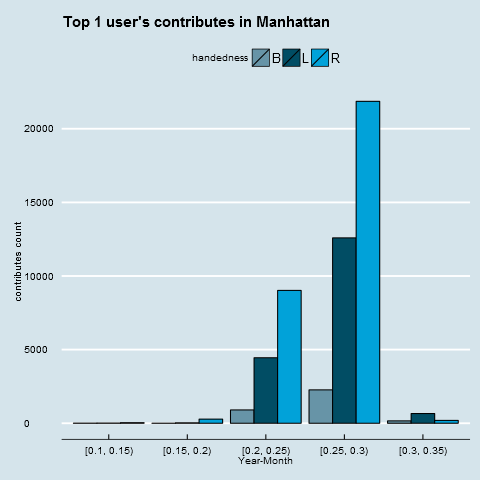

In [97]:
%%R -i df
df <- as.data.frame(df)
library(ggplot2)
library(ggthemes)
ggplot(aes(x = avg_category, y=HR, fill=handedness), data = df) + 
    theme_economist() +
    scale_fill_economist() +
#     theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    geom_bar(stat = "identity", color = I('black'), position="dodge") +
    xlab('Year-Month') + 
    ylab('contributes count') +
    ggtitle("Top 1 user's contributes in Manhattan")

In [56]:
a = df.drop(['height', 'weight', 'avg'], axis=1).groupby(by=['avg_category', 'handedness']).sum()
a

HR
avg_category handedness       
[0.1, 0.15)  B               9
             L              11
             R              41
[0.15, 0.2)  B               2
             L              32
             R             279
[0.2, 0.25)  B             904
             L            4449
             R            9020
[0.25, 0.3)  B            2268
             L           12591
             R           21861
[0.3, 0.35)  B             160
             L             660
             R             194

In [81]:
a.to_csv('data/cleaned_baseball.csv')

In [82]:
df = read_csv('data/cleaned_baseball.csv')
df

,avg_category,handedness,HR
0,"[0.1, 0.15)",B,9
1,"[0.1, 0.15)",L,11
2,"[0.1, 0.15)",R,41
3,"[0.15, 0.2)",B,2
4,"[0.15, 0.2)",L,32
5,"[0.15, 0.2)",R,279
6,"[0.2, 0.25)",B,904
7,"[0.2, 0.25)",L,4449
8,"[0.2, 0.25)",R,9020
9,"[0.25, 0.3)",B,2268
